In [ ]:
import numpy as np
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import plot_importance


public_data = pd.read_csv('extracted_public_data.csv')
public_data = public_data.dropna()
mapping = {
    "precision": {"single": 0, "double": 1},
    "backend": {"GPU": 0, "CPU": 1}
}
remapped_public_data = public_data.replace(mapping)
remapped_public_data['normalized_threshold'] = (1/8) * np.log2(remapped_public_data['threshold'])

features = pd.read_csv('qasm_features_scaled.csv')

match_col_test = remapped_public_data.columns[0]
match_col_features = features.columns[0]

inputs = pd.merge(
    remapped_public_data, 
    features, 
    left_on=match_col_test, 
    right_on=match_col_features, 
    how='left'
)
inputs = inputs.drop(columns=[match_col_features])



y = np.log(public_data['expected_runtime_sec'])
inputs = inputs.drop(columns=['circuit', "threshold", 'fidelity', 'expected_runtime_sec'])

inputs.to_csv('inputs.csv', index=False)



C:\Users\percy\AppData\Local\Temp\ipykernel_37796\993031784.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  remapped_public_data = public_data.replace(mapping)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2, random_state=42)
eval_set = [(x_train, y_train), (x_test, y_test)]


xgb_model = xgb.XGBRegressor(
        n_estimators=1992,
        max_depth=7,
        rate_drop=0.1,
        skip_drop=0.5,
        learning_rate=0.022920102631846767,
        subsample=0.6045202444830257,
        colsample_bytree=0.91678701035139,
        reg_alpha=0.3272952913628665,
        reg_lambda=0.08215114108588457,
        random_state=42,
        eval_metric=["rmse"], 
        objective="reg:linear"
    )

In [61]:
xgb_model.fit(
    x_train, 
    y_train, 
    eval_set=eval_set,
    verbose=True  # This ensures the output is printed per iteration
)

[0]	validation_0-rmse:2.20918	validation_1-rmse:2.35490
[1]	validation_0-rmse:2.16269	validation_1-rmse:2.30712
[2]	validation_0-rmse:2.11622	validation_1-rmse:2.25963
[3]	validation_0-rmse:2.06961	validation_1-rmse:2.20902
[4]	validation_0-rmse:2.02564	validation_1-rmse:2.16393
[5]	validation_0-rmse:1.98284	validation_1-rmse:2.12109
[6]	validation_0-rmse:1.94411	validation_1-rmse:2.08192
[7]	validation_0-rmse:1.90403	validation_1-rmse:2.03897
[8]	validation_0-rmse:1.86509	validation_1-rmse:1.99992
[9]	validation_0-rmse:1.82567	validation_1-rmse:1.95811
[10]	validation_0-rmse:1.79888	validation_1-rmse:1.93127
[11]	validation_0-rmse:1.76170	validation_1-rmse:1.89479
[12]	validation_0-rmse:1.72657	validation_1-rmse:1.85876
[13]	validation_0-rmse:1.69005	validation_1-rmse:1.82178


[14]	validation_0-rmse:1.65506	validation_1-rmse:1.78746
[15]	validation_0-rmse:1.62978	validation_1-rmse:1.76472
[16]	validation_0-rmse:1.60494	validation_1-rmse:1.74128
[17]	validation_0-rmse:1.57141	validation_1-rmse:1.70834
[18]	validation_0-rmse:1.55028	validation_1-rmse:1.69134
[19]	validation_0-rmse:1.51750	validation_1-rmse:1.65675
[20]	validation_0-rmse:1.49055	validation_1-rmse:1.63122
[21]	validation_0-rmse:1.46055	validation_1-rmse:1.59969
[22]	validation_0-rmse:1.43846	validation_1-rmse:1.57745
[23]	validation_0-rmse:1.41075	validation_1-rmse:1.54788
[24]	validation_0-rmse:1.38139	validation_1-rmse:1.51799
[25]	validation_0-rmse:1.35364	validation_1-rmse:1.48956
[26]	validation_0-rmse:1.32645	validation_1-rmse:1.46303
[27]	validation_0-rmse:1.29875	validation_1-rmse:1.43472
[28]	validation_0-rmse:1.27633	validation_1-rmse:1.41215
[29]	validation_0-rmse:1.25807	validation_1-rmse:1.39678
[30]	validation_0-rmse:1.23265	validation_1-rmse:1.37052
[31]	validation_0-rmse:1.20900	

c:\Users\percy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:55:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\percy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:55:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "rate_drop", "skip_drop" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[105]	validation_0-rmse:0.38532	validation_1-rmse:0.55532
[106]	validation_0-rmse:0.38123	validation_1-rmse:0.55135
[107]	validation_0-rmse:0.37652	validation_1-rmse:0.54752
[108]	validation_0-rmse:0.37162	validation_1-rmse:0.54285
[109]	validation_0-rmse:0.36658	validation_1-rmse:0.53851
[110]	validation_0-rmse:0.36239	validation_1-rmse:0.53511
[111]	validation_0-rmse:0.35850	validation_1-rmse:0.53114
[112]	validation_0-rmse:0.35382	validation_1-rmse:0.52746
[113]	validation_0-rmse:0.34950	validation_1-rmse:0.52351
[114]	validation_0-rmse:0.34562	validation_1-rmse:0.52005
[115]	validation_0-rmse:0.34170	validation_1-rmse:0.51604
[116]	validation_0-rmse:0.33774	validation_1-rmse:0.51293
[117]	validation_0-rmse:0.33382	validation_1-rmse:0.50943
[118]	validation_0-rmse:0.33007	validation_1-rmse:0.50637
[119]	validation_0-rmse:0.32757	validation_1-rmse:0.50460
[120]	validation_0-rmse:0.32387	validation_1-rmse:0.50122
[121]	validation_0-rmse:0.32034	validation_1-rmse:0.49649
[122]	validati

,objective,'reg:linear'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.91678701035139
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,['rmse']


In [62]:
y_pred = xgb_model.predict(x_test)

In [63]:
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.10159320319342327


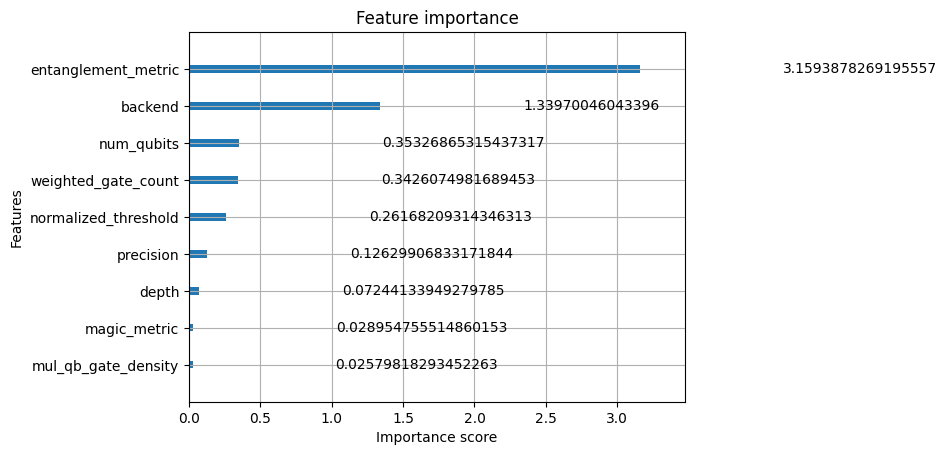

In [64]:
plot_importance(xgb_model, importance_type='gain')
plt.show()

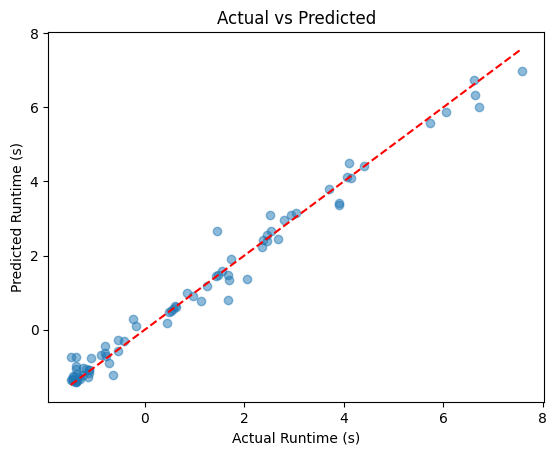

In [65]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Runtime (s)')
plt.ylabel('Predicted Runtime (s)')
plt.title('Actual vs Predicted')
plt.show()

In [66]:
xgb_model.save_model("runtime_xgboost.json")

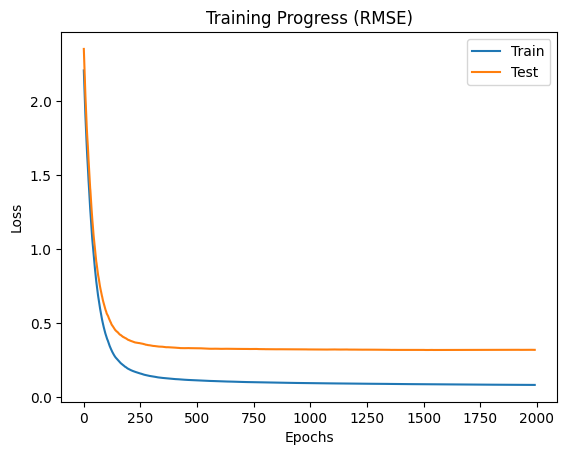

In [67]:
# Retrieve and plot the training logs
results = xgb_model.evals_result()

plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.title('Training Progress (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
